In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
df=pd.read_csv('TaxiFare.csv')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv('TaxiFare.csv')

In [ ]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
df.shape

(50000, 8)

In [2]:
df.info()

NameError: ignored

<Axes: xlabel='no_of_passenger', ylabel='count'>

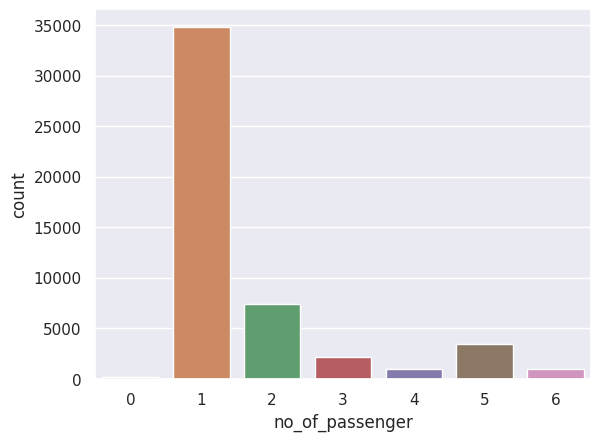

In [ ]:
sns.countplot(x=df['no_of_passenger'])

In [ ]:
df=df[df['no_of_passenger']==1]

In [ ]:
df=df.drop(['unique_id','no_of_passenger'],axis=1)

In [ ]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233


In [ ]:
df.shape

(34808, 6)

In [ ]:
corr_matrix = df.corr()
corr_matrix["amount"].sort_values(ascending=False)

amount                  1.000000
no_of_passenger         0.016583
longitude_of_pickup     0.005944
longitude_of_dropoff    0.004286
latitude_of_dropoff    -0.005442
latitude_of_pickup     -0.007338
Name: amount, dtype: float64

In [ ]:
import datetime
from math import sqrt

for i, row in df.iterrows():
    dt = datetime.datetime.strptime(row['date_time_of_pickup'], '%Y-%m-%d %H:%M:%S UTC')
    df.at[i, 'day_of_week'] = dt.weekday()
    df.at[i, 'pickup_time'] = dt.hour
    x = (row['longitude_of_dropoff'] - row['longitude_of_pickup']) * 54.6 # 1 degree == 54.6 miles
    y = (row['latitude_of_dropoff'] - row['latitude_of_pickup']) * 69.0   # 1 degree == 69 miles
    distance = sqrt(x**2 + y**2)
    df.at[i, 'distance'] = distance

df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,day_of_week,pickup_time,distance
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,0.0,17.0,0.641024
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,16.0,5.275538
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,5.0,4.0,1.738444
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,7.0,1.253707
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,3.0,9.0,2.391384


In [ ]:
df.drop(columns=['date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff'], inplace=True)
df.head()

,amount,day_of_week,pickup_time,distance
0,4.5,0.0,17.0,0.641024
1,16.9,1.0,16.0,5.275538
3,7.7,5.0,4.0,1.738444
4,5.3,1.0,7.0,1.253707
5,12.1,3.0,9.0,2.391384


In [ ]:
corr_matrix = df.corr()
corr_matrix["amount"].sort_values(ascending=False)

amount         1.000000
distance       0.014725
day_of_week    0.010151
pickup_time   -0.015876
Name: amount, dtype: float64

In [ ]:
df.describe()

,amount,day_of_week,pickup_time,distance
count,34808.000000,34808.000000,34808.000000,34808.000000
mean,11.210226,2.947713,13.382757,11.850895
std,9.527580,1.942392,6.401627,246.753948
min,-5.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,9.000000,0.771727
50%,8.500000,3.000000,14.000000,1.322725
75%,12.500000,5.000000,19.000000,2.414889
max,200.000000,6.000000,23.000000,24861.003946


In [ ]:
df = df[(df['distance'] > 1.0) & (df['distance'] < 10.0)]
df = df[(df['amount'] > 0.0) & (df['amount'] < 50.0)]
df.shape

(21318, 4)

In [ ]:
corr_matrix = df.corr()
corr_matrix["amount"].sort_values(ascending=False)

amount         1.000000
distance       0.848715
day_of_week    0.002447
pickup_time   -0.018968
Name: amount, dtype: float64

In [ ]:
x = df.drop(['amount'], axis=1)
y = df['amount']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.score(x_test, y_test)

0.7294968092631228

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, x, y, cv=5).mean()

0.7207057353445661

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, model.predict(x_test))

2.428339345293518

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=0)
model.fit(x_train, y_train)

cross_val_score(model, x, y, cv=5).mean()

0.6997168858484374

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor(random_state=0)
model.fit(x_train, y_train)

cross_val_score(model, x, y, cv=5).mean()

0.6377587278626594

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=0)
model.fit(x_train, y_train)

cross_val_score(model, x, y, cv=5).mean()

0.45823890738024853

In [ ]:
model.predict([[4,17,2.0]])

array([19.5])

In [ ]:
model.predict([[5,17,2.0]])

array([14.])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df.head()

,amount,day_of_week,pickup_time,distance
1,16.9,1.0,16.0,5.275538
3,7.7,5.0,4.0,1.738444
4,5.3,1.0,7.0,1.253707
5,12.1,3.0,9.0,2.391384
7,16.5,2.0,17.0,2.650494
